In [1]:
%cd ..

C:\Users\Jeffrey\Downloads\DSA4263_Sense_Making_Case_Analysis_Business_Commerce\root


## Training

Functions only quantitatively evaluate. Use notebook to do qualitative evaluation

In [2]:
from src.model.tm.tm_train import evaluate_topic_models, build_gensim_model
from gensim import corpora
import pandas as pd
import seaborn as sns

In [3]:
tm_bow_dict = corpora.Dictionary.load('models/tm/tm_bow_dict.dict')
tm_bow_corpus = corpora.MmCorpus('models/tm/tm_bow_corpus.mm')
tm_tfidf_corpus = corpora.MmCorpus('models/tm/tm_tfidf_corpus.mm')
lemma_text = [[tm_bow_dict[bow[0]] for bow in sent] for sent in tm_bow_corpus]

In [4]:
model_name = ['lda', 'nmf', 'lsa']
corpuses = {
    'bow': tm_bow_corpus,
    'tfidf': tm_tfidf_corpus
}
num_topics = list(range(5, 15))

In [5]:
df = evaluate_topic_models(model_name, corpuses, tm_bow_dict, lemma_text, num_topics)

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [10:22<00:00, 10.37s/it]


In [6]:
# model_results.to_csv('ipynb/model_results.csv', index=False)
model_results = pd.read_csv('ipynb/model_results.csv', index_col=False)

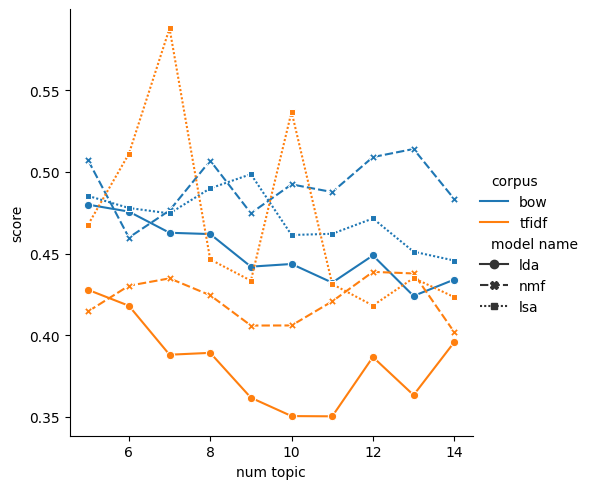

In [7]:
sns.relplot(x='num topic', y='score', hue='corpus', 
            style='model name', kind='line', markers=True, data=model_results);

## Using

In [6]:
from src.model.tm.tm_predict import load_model, predict, batch_predict, TM_MODEL_PREDICT
from src.preprocessing.tm_preprocessing import TM_PREPROCESS_TEST
from ast import literal_eval

In [7]:
# ensure that you've trained the model using the python module
# ensure that you've updated config.yml

model = load_model()

In [8]:
# let's say you have a non-tfidf bow corpus
predict(tm_bow_corpus[0], model)

[('topic0', 0.02),
 ('topic1', 0.02),
 ('topic2', 0.02),
 ('topic3', 0.94),
 ('topic4', 0.02)]

In [9]:
# let's say you have a list of tfidf corpus
corp_ = [doc for doc in tm_tfidf_corpus]
batch_pred = batch_predict(corp_, model)

In [10]:
batch_pred[0:4]

[[('topic0', 0.05),
  ('topic1', 0.05),
  ('topic2', 0.05),
  ('topic3', 0.8),
  ('topic4', 0.05)],
 [('topic0', 0.04),
  ('topic1', 0.04),
  ('topic2', 0.04),
  ('topic3', 0.83),
  ('topic4', 0.04)],
 [('topic0', 0.03),
  ('topic1', 0.03),
  ('topic2', 0.03),
  ('topic3', 0.03),
  ('topic4', 0.87)],
 [('topic0', 0.36),
  ('topic1', 0.03),
  ('topic2', 0.54),
  ('topic3', 0.03),
  ('topic4', 0.03)]]

In [12]:
# let's say you have a dataframe with cleaned column 'Text'
tmp = pd.read_csv('src/data/tm/20230405230550_CLEANED_DF.csv', index_col=False, nrows=30)

In [13]:
# list values are loaded as strings. must change them back to list
tmp['processed_text'] = tmp['Text'].apply(lambda x: literal_eval(x))

In [14]:
tmp.head()

,Sentiment,Time,Text,processed_text
0,positive,18/6/21,"['healthy', 'dog', 'food', 'good', 'digestion'...","[healthy, dog, food, good, digestion, good, sm..."
1,positive,7/7/21,"['pleased', 'natural', 'balance', 'dog', 'food...","[pleased, natural, balance, dog, food, dog, is..."
2,positive,18/6/21,"['educated', 'feline', 'nutrition', 'allowed',...","[educated, feline, nutrition, allowed, cat, ad..."
3,positive,7/7/21,"['holistic', 'vet', 'recommended', 'brand', 't...","[holistic, vet, recommended, brand, tried, cat..."
4,positive,1/7/21,"['bought', 'coffee', 'cheaper', 'ganocafe', 'o...","[bought, coffee, cheaper, ganocafe, organic, r..."


In [16]:
# this is the function that is used by the api to make predictions
# as such, the model that has been trained is auto loaded in the 
# function
tmp = TM_MODEL_PREDICT(tmp)

In [18]:
tmp.head()

,Sentiment,Time,Text,Predicted Topic
0,positive,18/6/21,"['healthy', 'dog', 'food', 'good', 'digestion'...","[(topic0, 0.05), (topic1, 0.05), (topic2, 0.05..."
1,positive,7/7/21,"['pleased', 'natural', 'balance', 'dog', 'food...","[(topic0, 0.04), (topic1, 0.04), (topic2, 0.04..."
2,positive,18/6/21,"['educated', 'feline', 'nutrition', 'allowed',...","[(topic0, 0.03), (topic1, 0.03), (topic2, 0.03..."
3,positive,7/7/21,"['holistic', 'vet', 'recommended', 'brand', 't...","[(topic0, 0.36), (topic1, 0.03), (topic2, 0.54..."
4,positive,1/7/21,"['bought', 'coffee', 'cheaper', 'ganocafe', 'o...","[(topic0, 0.04), (topic1, 0.78), (topic2, 0.04..."
